In [129]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [130]:
# html img map
json_data_sales = open('./out/cleanAsinSimilarProductsPriceBrandImageDict.json').read()
json_data = open('./out/HomeKitchenFinal2.json').read()
sales_data = json.loads(json_data_sales)
review_description_data = json.loads(json_data)

In [131]:
len( json_data_sales )

2065484

In [132]:
for key in sales_data :
    print(  sales_data[key].keys()  )

dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['s

dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['simil

dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'imUrl', 'price'])
dict_keys(['similar', 'brand', 'imUrl', 'price'])
dict_keys(['

In [133]:
from collections import defaultdict

In [134]:
def reverse_asin_price_function( data ) :
    reverse_price_asin = defaultdict( list )
    for key in data :  #some data don't have price
        sales_keyword = None
        if 'price' in data[key] :
            sales_keyword = 'price'
        elif 'sales' in data[key]:
            sales_keyword = 'sales'
        if sales_keyword is not None :
            price = data[key][ sales_keyword ]
            reverse_price_asin[ price ].append( key )
    return reverse_price_asin

reverse_price_asin = reverse_asin_price_function( sales_data )
reverse_price_asin

defaultdict(list,
            {69.95: ['B0093SLXD8',
              'B004R952PI',
              'B0040M4D0W',
              'B000LTPF96',
              'B003S8KLPU',
              'B001ICUNSI'],
             4.69: ['B000H6AESK',
              'B003OR3H7Y',
              'B000H6CA46',
              'B000H6H44M',
              'B000H6C5PK'],
             167.0: ['B000NPTZY4', 'B005OYC4BU'],
             11.22: ['B00352LOKA'],
             49.06: ['B000J4MIHK'],
             148.75: ['B000MRV7QM'],
             109.34: ['B003IB5TZE'],
             64.43: ['B0046EC0LS'],
             5.57: ['B003O9GH56', 'B0006L7KY2'],
             31.49: ['B000BKBJWW', 'B004XOOGUY', 'B00027EXLI', 'B006IJ3XB0'],
             20.12: ['B005HER56G'],
             23.97: ['B0000CNQX2', 'B00GXJMWUI', 'B003JKL444', 'B004GXAJ4Y'],
             59.99: ['B0027EMTD8',
              'B000FHF2Q0',
              'B004FTOTUY',
              'B00HVC7ZP8',
              'B0096JYGME',
              'B004FTOTS6',
           

In [135]:
sales_list = list( reverse_price_asin.keys() )
sales_list.sort( reverse=True )
top10 = sales_list[:10]
last10 = sales_list[-10 : ]
top10

[924.99, 913.0, 899.0, 849.0, 839.0, 799.99, 799.97, 767.95, 699.0, 680.0]

In [136]:
top10data = {}
for entry in top10 :
    asins = reverse_price_asin[entry]
    for asin in asins :
        reviews = review_description_data[ asin ]['reviewBow']
        description = review_description_data[ asin ]['descriptionBow']
        top10data[ asin ] = {'price' : entry, 'reviewBow' : reviews, 'descriptionBow' : description}

In [137]:
last10data = {}
for entry in last10 :
    asins = reverse_price_asin[entry]
    for asin in asins :
        reviews = review_description_data[ asin ]['reviewBow']
        description = review_description_data[ asin ]['descriptionBow']
        last10data[ asin ] = {'price' : entry, 'reviewBow' : reviews, 'descriptionBow' : description}

In [138]:
def preprocess_level1(  data ) :
    reviewDoc = []; descDoc = []
    for asin in data :
        reviewStr = " ".join( data[asin]['reviewBow'] )
        descStr = " ".join( data[asin]['descriptionBow'] )
        reviewDoc.append( reviewStr )
        descDoc.append( descStr )
    return reviewDoc, descDoc

In [139]:
reviewDoc, descDoc = preprocess_level1( top10data )
reviewDoc[:3]

['debated long time steelcase aeron end bought one quite satisfied nt lot fussy controls like steelcase automatically conforms current position body moves around preferable kicker arm broke couple years humanscale sent new arm free sent two new arms since new ones better old ones let see herman miller',
 'model herman miller aeron chair work began telecommuting time knew upgrade home office chair ca nt think type adjustment want ca nt chair adjust height simple lever pull well arm height angle lumbar support far back forward seat back recline oh yes also adjust much pressure need put seat back reclinethe seat back open weave making cool comfortable chairi guess best measure good chair fact expensive sitting one work six years knew product worth costthe product came almost fully assembled got lumbar support option rather posturefit adjustment option lumbar support screw four screws probably took ten minutes assemble including opening package',
 'better looks although may feel little har

In [140]:
def preprocess_level2( documents, no_features = 10) :
    # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
    tf_vectorizer = CountVectorizer(input='content', max_df=1.0, min_df=0.0,max_features=no_features, stop_words='english')
    tf = tf_vectorizer.fit_transform(documents)
    return tf, tf_vectorizer

In [141]:
tf, tf_vectorizer = preprocess_level2( reviewDoc )
tf

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [142]:
no_topics = 5
# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,random_state=0)

lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['bed',
 'chair',
 'firm',
 'good',
 'mattress',
 'new',
 'nt',
 'product',
 'support',
 'time']

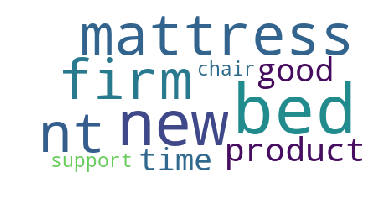

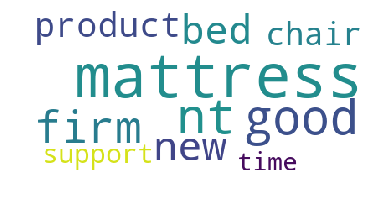

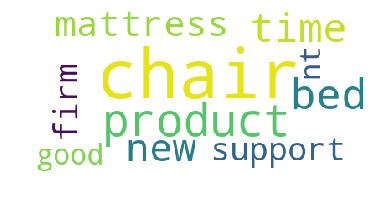

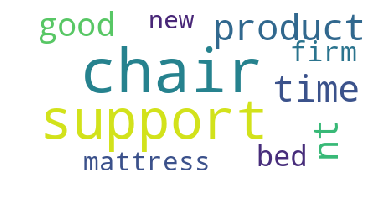

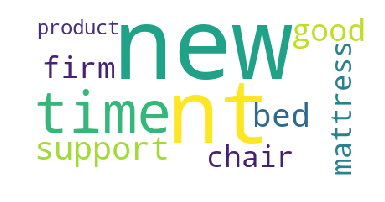

In [143]:
import wordcloud
import math
import matplotlib.pyplot as plt
for i in range ( no_topics ):
    termsInTopic = lda.components_[i].argsort()#[:-50-1:-1]
    termsAndCounts = []
    for term in termsInTopic:
        termsAndCounts.append((str(tf_feature_names[term].strip()),math.ceil(lda.components_[i][term]*1000)))

    
    termsAndCountsDict = {}
    for product,count in termsAndCounts :
        termsAndCountsDict[ product ] = count
    cloud = wordcloud.WordCloud(background_color="white")
    cloud.generate_from_frequencies(termsAndCountsDict)
    plt.imshow(cloud)
    plt.axis("off")
    plt.savefig(str(i))
    plt.show()

In [144]:
reviewDoc, descDoc = preprocess_level1( last10data )
reviewDoc[:3]

['several vinturi well brands aerators one favorite pour wine job find perfect attach easily bottles unlike brands hold use stand put straw bottle make almost noise unlike brands slurp burble loudly enough disrupt shows conversations spout makes drip splash free even rushed pouring quickly bunch people finally really precise much pour pour slowed exacting amount really handy pouring tastingsi probably buy even ready give away old aeratorsoh doubt handy piece job good decanter think poured beforeafter afterbefore comparisons many wines distinct difference easy noticethe thing could possibly improve would built air tight stopper attachment',
 'got shoe sin fit organized perfectly tried zipping bag put bed mistake zipper broke moved inch bag overstuffed flip flops smaller shoes inside tons extra room th etop broken easily tried using zipper provided inches zipper tore side plastic zipper broke side well promise pull hard thing cheap pain return ept shoved bed plastic draped top keeping in

In [145]:
tf, tf_vectorizer = preprocess_level2( reviewDoc )
tf

<14x10 sparse matrix of type '<class 'numpy.int64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [146]:

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,random_state=0)

lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['buy',
 'cut',
 'easy',
 'filter',
 'fridge',
 'nt',
 'plastic',
 'price',
 'size',
 'use']

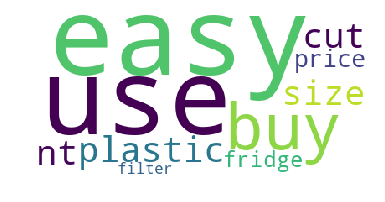

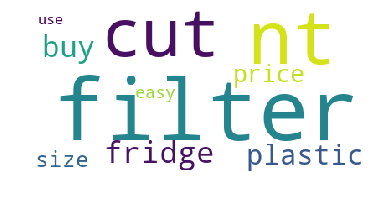

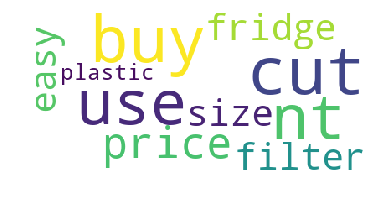

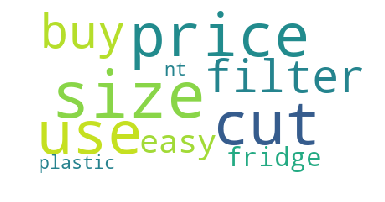

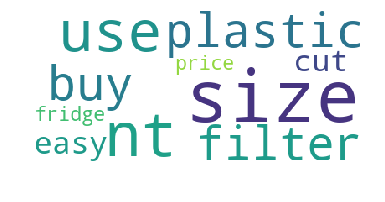

In [147]:
for i in range ( no_topics ):
    termsInTopic = lda.components_[i].argsort()#[:-50-1:-1]
    termsAndCounts = []
    for term in termsInTopic:
        termsAndCounts.append((str(tf_feature_names[term].strip()),math.ceil(lda.components_[i][term]*1000)))

    
    termsAndCountsDict = {}
    for product,count in termsAndCounts :
        termsAndCountsDict[ product ] = count
    cloud = wordcloud.WordCloud(background_color="white")
    cloud.generate_from_frequencies(termsAndCountsDict)
    plt.imshow(cloud)
    plt.axis("off")
    plt.savefig(str(i))
    plt.show()

In [148]:
json_data_all = open('./out/385sampleDict.json').read()
all_sales_data = json.loads(json_data_all)
all_sales_data [ list(all_sales_data.keys())[0] ]

{'descriptionPoliteness': 0.7670823547276673,
 'descriptionSentimentCom': 0.0,
 'descriptionSentimentNeg': 0.0,
 'descriptionSentimentNeu': 1.0,
 'descriptionSentimentPos': 0.0,
 'empath_description_achievement': 0.0,
 'empath_description_affection': 0.0,
 'empath_description_aggression': 0.0,
 'empath_description_air_travel': 0.0,
 'empath_description_alcohol': 0.0,
 'empath_description_ancient': 0.0,
 'empath_description_anger': 0.0,
 'empath_description_animal': 0.0,
 'empath_description_anonymity': 0.0,
 'empath_description_anticipation': 0.0,
 'empath_description_appearance': 0.0,
 'empath_description_art': 0.038461538461538464,
 'empath_description_attractive': 0.0,
 'empath_description_banking': 0.0,
 'empath_description_beach': 0.0,
 'empath_description_beauty': 0.0,
 'empath_description_blue_collar_job': 0.0,
 'empath_description_body': 0.038461538461538464,
 'empath_description_breaking': 0.0,
 'empath_description_business': 0.038461538461538464,
 'empath_description_car': 0.

In [149]:
reverse_price_asin = reverse_asin_price_function( all_sales_data )

In [150]:
sales_list = list( reverse_price_asin.keys() )
sales_list.sort( reverse=True )
top10 = sales_list[:10]
last10 = sales_list[-10 : ]
last10

[28, 26, 21, 19, 14, 13, 11, 9, 7, 5]

In [151]:
top10data = {}
for entry in top10 :
    asins = reverse_price_asin[entry]
    for asin in asins :
        reviews = review_description_data[ asin ]['reviewBow']
        description = review_description_data[ asin ]['descriptionBow']
        top10data[ asin ] = {'price' : entry, 'reviewBow' : reviews, 'descriptionBow' : description}

In [152]:
last10data = {}
for entry in last10 :
    asins = reverse_price_asin[entry]
    for asin in asins :
        reviews = review_description_data[ asin ]['reviewBow']
        description = review_description_data[ asin ]['descriptionBow']
        last10data[ asin ] = {'price' : entry, 'reviewBow' : reviews, 'descriptionBow' : description}

In [153]:
reviewDoc, descDoc = preprocess_level1( top10data )
reviewDoc[:3]

['thing works exactly described past years used recycled grocery bags instead trash bags holder perfect storing mounts anywhere stick attach two screws super easy stuff top easy get bag mine mounted door sink convenient',
 'seems irons vaccum cleaner catergory never seem last perform consistently far good panasonic ergonomically fit performance excellent',
 'made thin hollow tubbing seems aluminum really thin steel base sides thin plastic rigid men hold pairs unless stack']

In [154]:
tf, tf_vectorizer = preprocess_level2( reviewDoc )
tf

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [155]:
no_topics = 5
# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,random_state=0)

lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['brush',
 'easy',
 'holder',
 'kitchen',
 'like',
 'love',
 'nt',
 'price',
 'quickly',
 'stick']

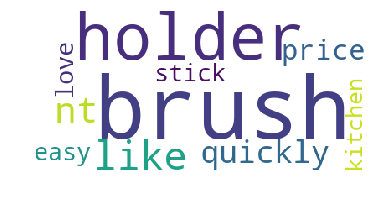

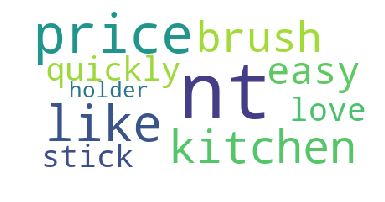

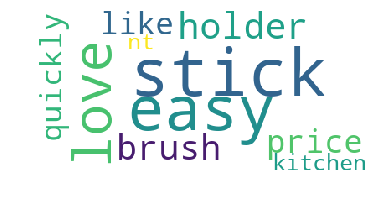

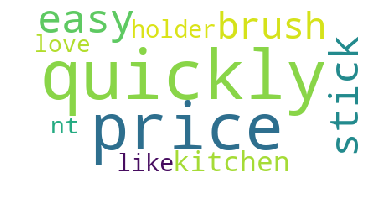

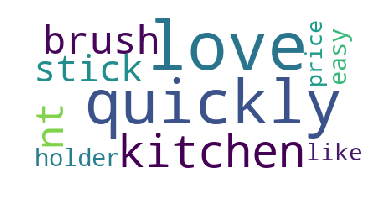

In [156]:
for i in range ( no_topics ):
    termsInTopic = lda.components_[i].argsort()#[:-50-1:-1]
    termsAndCounts = []
    for term in termsInTopic:
        termsAndCounts.append((str(tf_feature_names[term].strip()),math.ceil(lda.components_[i][term]*1000)))

    
    termsAndCountsDict = {}
    for product,count in termsAndCounts :
        termsAndCountsDict[ product ] = count
    cloud = wordcloud.WordCloud(background_color="white")
    cloud.generate_from_frequencies(termsAndCountsDict)
    plt.imshow(cloud)
    plt.axis("off")
    plt.savefig(str(i))
    plt.show()

In [157]:
reviewDoc, descDoc = preprocess_level1( last10data )
reviewDoc[:3]

['like rack storing plates cups saucers etc cabinet takes little space real spacesaver',
 'bit flimsy set mostly plastic stuff still falls probably ordered undersink sliding drawer nt going go trouble sending back give much space vanity sink',
 'strong made well much stronger thought would holds year old ironing board heavy iron easy slid spectrum door iron ironing board holder standard sized interior door put small bungee cord around top ironing board wrapped around ironing board holder keeps ironing board trying come openi believe much room ironing board holder freed utility room']

In [158]:
tf, tf_vectorizer = preprocess_level2( reviewDoc )
tf

<12x10 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [159]:

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,random_state=0)

lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['board',
 'cabinet',
 'easy',
 'heavy',
 'holder',
 'ironing',
 'lids',
 'nt',
 'space',
 'work']

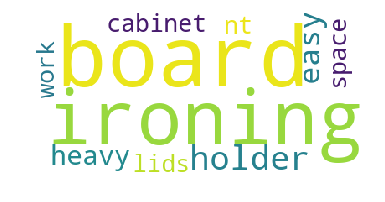

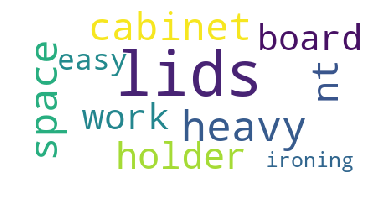

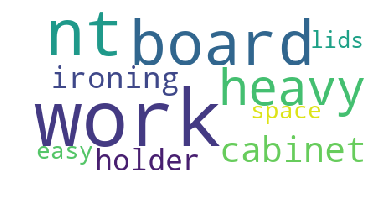

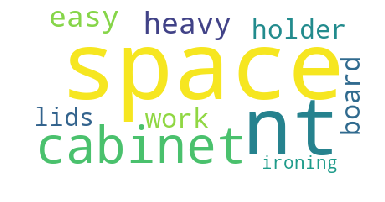

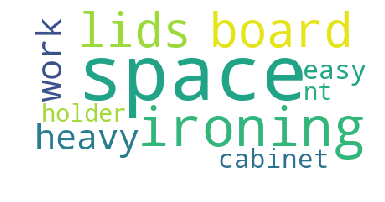

In [160]:
for i in range ( no_topics ):
    termsInTopic = lda.components_[i].argsort()#[:-50-1:-1]
    termsAndCounts = []
    for term in termsInTopic:
        termsAndCounts.append((str(tf_feature_names[term].strip()),math.ceil(lda.components_[i][term]*1000)))

    
    termsAndCountsDict = {}
    for product,count in termsAndCounts :
        termsAndCountsDict[ product ] = count
    cloud = wordcloud.WordCloud(background_color="white")
    cloud.generate_from_frequencies(termsAndCountsDict)
    plt.imshow(cloud)
    plt.axis("off")
    plt.savefig(str(i))
    plt.show()